## Problem description
The topic of this challenge are countries' trade statistics. You will need to request trade data from the **Comtrade data extraction API** of the United Nations (UN) and further process, analyze and visualize the data. The following data related aspects deserve particular mention:

- **API documentation**: The UN Comtrade data extraction API is described in detail here: https://comtrade.un.org/data/doc/api. You will need to carefully study this API and the provided explanations.
- **Interactive exploration**: To better understand the data and the API parameters, you can also use the (1) [data selection interface](https://comtrade.un.org/Data/.) or (2) [run API queries interactively](https://comtrade.un.org/api/swagger/ui/index#!/Data/Data_GetData).
- **No registration**: This is a Public API. Hence, you can use the API as a guest user, i.e. without registration and authentication (which would cost money).
- **Rate limits**: Different kinds of rate limits apply, especially for guest users. For instance, you may only run one request per second. The limits are precisely described on the web site. Some of your tasks can be solved without special efforts within the given rate limits. However, some of the tasks may require that you explicitly deal with the limits. For instance, you may need to force Python to wait for 1 second before running the next request.
- **Default values**: Note that most of the parameters have a certain default value, as specified in the API documentation. If you don't explicitly define the parameter in your query, the default value is assumed. Throughout the entire notebook, you can ignore (i.e. stick to the default values of) the following parameters:
    - `fmt`: default data format is JSON.
    - `type`: default trade data type is commodity trade (as opposed to services trade)
    - `freq`: default frequency is annual data (as opposed to monthly data)
    - `px`: default classification of commodities is called HS (Harmonised System)

## 1) Ukraines Exports by Partner Country


**Request** the total (cc='TOTAL') exports (rg=2) of reporting country Ukraine (r=804) to all available partner countries/regions (p='all') in the year 2021 (ps=2021), and turn it into a Pandas DataFrame.

In [2]:
import requests
import pandas as pd
import time
url="https://comtrade.un.org/api/get?ps=2021&r=804&p=all&rg=2&cc=TOTAL"
r= requests.get(url).json()
df= pd.DataFrame(columns=["yr","rtcode", "rttitle", "ptcode", "pttitle", "cmdcode", "cmddesce", "rgcode", "rgdesc", "tradevalue"])
for item in r['dataset']:
    yr= item['yr']
    rtcode= item['rtCode']
    rttitle= item['rtTitle']
    ptcode= item['ptCode']
    pttitle= item['ptTitle']
    cmdcode= item['cmdCode']
    cmddesce= item['cmdDescE']
    rgcode= item['rgCode']
    rgdesc= item['rgDesc']
    tradevalue= item['TradeValue']
    
    df=df.append({"yr":yr,"rtcode":rtcode, "rttitle":rttitle, 
                  "ptcode":ptcode, "pttitle":pttitle, "cmdcode":cmdcode, 
                  "cmddesce":cmddesce, 
                  "rgcode":rgcode, "rgdesc":rgdesc, "tradevalue":tradevalue}, ignore_index=True)
dfi=df.sort_values(by=['tradevalue'], ascending=False)
dfi.head(10)

,yr,rtcode,rttitle,ptcode,pttitle,cmdcode,cmddesce,rgcode,rgdesc,tradevalue
0,2021,804,Ukraine,0,World,TOTAL,All Commodities,2,Export,65870275510
39,2021,804,Ukraine,156,China,TOTAL,All Commodities,2,Export,7992491765
145,2021,804,Ukraine,616,Poland,TOTAL,All Commodities,2,Export,4979134699
182,2021,804,Ukraine,792,Turkey,TOTAL,All Commodities,2,Export,3999617927
150,2021,804,Ukraine,643,Russian Federation,TOTAL,All Commodities,2,Export,3349119521
89,2021,804,Ukraine,381,Italy,TOTAL,All Commodities,2,Export,3240255598
71,2021,804,Ukraine,276,Germany,TOTAL,All Commodities,2,Export,2789957319
161,2021,804,Ukraine,699,India,TOTAL,All Commodities,2,Export,2513804631
126,2021,804,Ukraine,528,Netherlands,TOTAL,All Commodities,2,Export,2128423194
187,2021,804,Ukraine,818,Egypt,TOTAL,All Commodities,2,Export,1909977890


Sort the data in descending order of the `tradevalue`
Display Ukraine's top 10 export partner countries in terms of the `tradevalue`.


**Visualize the data in the following way:**
- Visualize the exports to Ukraine's top 10 partner countries using a bar chart. Make sure that you exlude the partner country "World" from the data. Also make sure that the visualization is well readable and includes a title and axes labels.

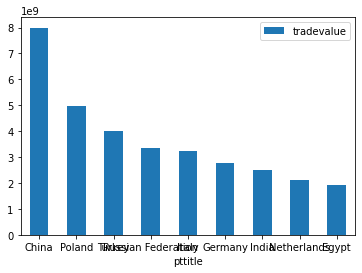

In [3]:
dft=dfi.head(10)
dft = dft.drop(labels=0, axis=0)
ax = dft.plot.bar(x='pttitle', y='tradevalue', rot=0)

## 2. Ukraines Exports by Product

**What are Ukraine's 10 most important export products in 2021? To answer the question, retrieve relevant data from the API and visualize it adequately.** 

In [6]:
url="https://comtrade.un.org/api/get?ps=2021&r=804&p=0&rg=2&cc=AG4&type=C"
r= requests.get(url).json()
ndf=pd.DataFrame(columns=["cmdcode","cmddesce", "tradevalue"])
for item in r['dataset']:
    cmdcode=item['cmdCode']
    cmddesce=item['cmdDescE']
    cmddesce=str(cmddesce).split(";")[0]
    tradevalue=item['TradeValue']
    
    ndf=ndf.append({"cmdcode":cmdcode, "cmddesce":cmddesce, "tradevalue":tradevalue}, ignore_index=True)
ndfi=ndf.sort_values(by=['tradevalue'], ascending=False)
ndfi.head(10)

,cmdcode,cmddesce,tradevalue
512,2601,Iron ores and concentrates,6810644409
431,1512,"Sun-flower seed, safflower or cotton-seed oil ...",6310573339
393,1005,Maize (corn),5854586543
389,1001,Wheat and meslin,4722745432
932,7207,Iron or non-alloy steel,3888485416
933,7208,Iron or non-alloy steel,3436731795
1075,8544,"Insulated wire, cable and other electric condu...",1625403077
927,7201,"Pig iron and spiegeleisen in pigs, blocks or o...",1576712944
407,1205,Rape or colza seeds,1359007550
481,2306,Oil-cake and other solid residues,1275724580


## 3. Dependency of the World on Ukraine's Exports

**Currently, many supermarkets around the globe run out of products such as "cooking oil". This is said to be a consequence of the war in Ukraine and the fact that Ukraine is supplying a significant fraction of the worlds total exports of cooking oil. Your task is to analyze this question.** 

Specifically: 

- Consider the product `cc=1512` ("Sun-flower seed, safflower or cotton-seed oil and their fractions; whether or not refined, but not chemically modified")


In [7]:
url="https://comtrade.un.org/api/get?ps=2021&r=all&p=0&rg=2&cc=1512&type=C"
r= requests.get(url).json()
cdf=pd.DataFrame(columns=["rtcode","rttitle", "tradevalue","fraction"])
for item in r['dataset']:
    rttitle= item['rtTitle']
    rtcode= item['rtCode']
    tradevalue=item['TradeValue']
    
    cdf=cdf.append({"rttitle":rttitle, "rtcode":rtcode, "tradevalue":tradevalue}, ignore_index=True)
cdf['fraction'] = (cdf['tradevalue'] / cdf['tradevalue'].sum()) * 100
cdfi=cdf.sort_values(by=['tradevalue'], ascending=False)
cdfi.head(10)


,rtcode,rttitle,tradevalue,fraction
51,804,Ukraine,6310573339,56.514447
50,792,Turkey,937160152,8.392754
36,528,Netherlands,849481155,7.607543
23,348,Hungary,703443096,6.299697
47,724,Spain,330534891,2.960111
19,276,Germany,281684115,2.522627
42,642,Romania,266053872,2.38265
43,688,Serbia,184094349,1.64866
3,56,Belgium,165880787,1.485548
54,842,USA,123497560,1.105984


## 4. Dependency of the World Function

**Create a Python function `world_dependency_plot` that is able to answer the previous question - as well as corresponding questions for different products and different years**.



In [8]:
def world_dependency_plot(ps,cc):
    ps=str(ps)
    cc=str(cc)
    url="https://comtrade.un.org/api/get?ps="+ps+"&r=all&p=0&rg=2&cc="+cc+"&type=C"
    r= requests.get(url).json()
    time.sleep(1)
    cdf=pd.DataFrame(columns=["rtcode","rttitle", "tradevalue","fraction"])
    for item in r['dataset']:
        rttitle= item['rtTitle']
        rtcode= item['rtCode']
        tradevalue=item['TradeValue']
        cdf=cdf.append({"rttitle":rttitle, "rtcode":rtcode, "tradevalue":tradevalue}, ignore_index=True)
    cdf['fraction'] = (cdf['tradevalue'] / cdf['tradevalue'].sum()) * 100
    cdfi=cdf.sort_values(by=['tradevalue'], ascending=False)
    
    return cdfi.head(10)

world_dependency_plot(ps=2020, cc=8703)

,rtcode,rttitle,tradevalue,fraction
43,276,Germany,122813825498,19.374137
56,392,Japan,80962000895,12.771925
119,842,USA,45642595742,7.200215
128,484,Mexico,40247406069,6.349112
60,410,Rep. of Korea,35638512409,5.62205
19,124,Canada,32007258932,5.049212
106,724,Spain,31510811933,4.970896
117,826,United Kingdom,26555054525,4.189115
101,703,Slovakia,24311483543,3.835187
7,56,Belgium,22101487505,3.486556
